In [1]:
# import libs
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


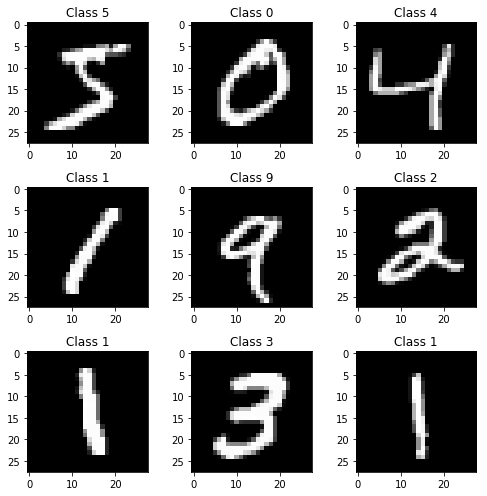

In [3]:
# visualize data
plt.rcParams['figure.figsize'] = (7, 7)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.title('Class {}'.format(y_train[i]))
plt.tight_layout()

In [4]:
# preprocessing data
# flatten 28 x 28 = 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
# normalize data
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train /= 255
x_test /= 255
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
# convert label to one-hot vector
classes = np.max(y_train) + 1
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

(60000, 10)
(10000, 10)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


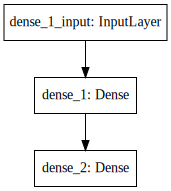

In [6]:
# build model
model = Sequential()
# input shape (*, 784), output shape (*, 512)
model.add(Dense(units = 512, input_shape = (784, ), activation = 'relu'))
# classifier
model.add(Dense(units = classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

print(model.summary())
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog = 'dot', format = 'svg'))

In [7]:
# train model
batch_size = 128
epochs = 4
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/4
60000/60000 [==============================] - 12s 201us/step - loss: 0.2710 - acc: 0.9213
Epoch 2/4
60000/60000 [==============================] - 5s 76us/step - loss: 0.1094 - acc: 0.9680
Epoch 3/4
60000/60000 [==============================] - 5s 76us/step - loss: 0.0720 - acc: 0.9786
Epoch 4/4
60000/60000 [==============================] - 5s 76us/step - loss: 0.0500 - acc: 0.9853


In [8]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose = 0)
print('accuracy = {}'.format(score[1]))

accuracy = 0.9761


correct: 9761
incorrect: 239


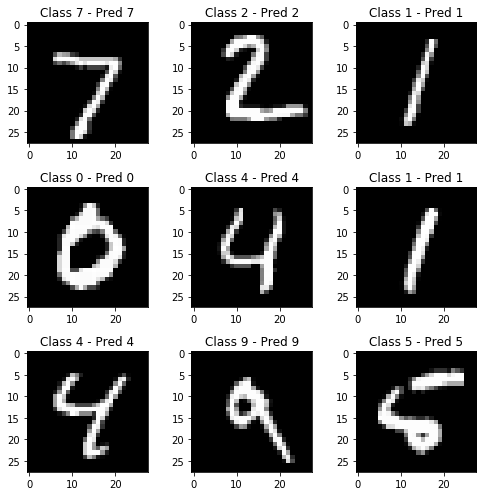

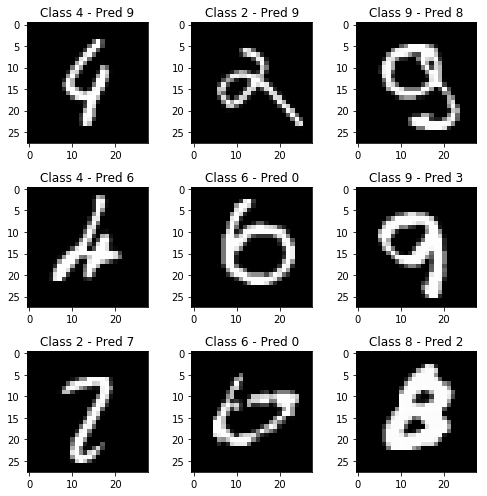

In [9]:
# test model
preds = model.predict(x_test)
correct, incorrect = [], []
for i in range(len(y_test)):
    if np.argmax(preds[i]) == np.argmax(y_test[i]):
        correct.append(i)
    else:
        incorrect.append(i)
print('correct: {}'.format(len(correct)))
print('incorrect: {}'.format(len(incorrect)))

# visualize result
plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[correct[i]].reshape(28, 28), cmap = 'gray')
    plt.title('Class {} - Pred {}'.format(np.argmax(y_test[correct[i]]), np.argmax(preds[correct[i]])))
plt.tight_layout()

plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[incorrect[i]].reshape(28, 28), cmap = 'gray')
    plt.title('Class {} - Pred {}'.format(np.argmax(y_test[incorrect[i]]), np.argmax(preds[incorrect[i]])))
plt.tight_layout()